# Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#  Load the dataset

In [20]:
df = pd.read_csv('/cancer.csv')
df.sample(n=10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,cancer_form
2210,179.890554,41.295820,-1524.839578,-0.697985,-15.178395,5.538089,6.549069,1
635,25.988871,89.459455,-620.451947,0.423571,-266.465416,0.715051,23.066501,0
4861,184.420121,-14.753183,-2695.865047,-0.326457,87.290858,18.917848,-9.156243,0
9362,322.358829,71.302635,-3816.545977,-1.646642,-32.286579,20.609884,-5.764260,1
7455,126.957038,18.804348,-1117.060698,-1.633929,-228.049756,22.317564,13.061518,0
5630,-84.823943,-68.879726,774.721870,-2.422628,-120.344797,22.851542,-18.997972,0
5538,45.436029,-37.925072,-3738.659762,-0.939083,-215.995287,52.121997,-24.492725,1
5649,-299.940575,-155.125102,-1344.926877,0.930052,-150.457618,49.502073,-38.458030,0
5348,-137.411829,-66.722492,2849.512523,-0.951024,-276.301460,10.561519,29.596312,1
6130,333.552230,117.277822,-2602.609357,-0.432025,-30.358641,-2.250558,22.649226,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_1    10000 non-null  float64
 1   feature_2    10000 non-null  float64
 2   feature_3    10000 non-null  float64
 3   feature_4    10000 non-null  float64
 4   feature_5    10000 non-null  float64
 5   feature_6    10000 non-null  float64
 6   feature_7    10000 non-null  float64
 7   cancer_form  10000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 625.1 KB


# Split the dataset into features (X) and labels (y)

In [22]:
X = df.drop(columns=['cancer_form']).values
y = df['cancer_form'].values


# Split the data into training, validation, and testing sets

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1408, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1408, shuffle=True)




# Feature scaling

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the perceptron model

In [25]:

def perceptron(X, W, b):
    z = np.dot(X, W) + b
    return z.flatten()

# Define the binary classification loss function

In [27]:
def gradient_b(y_true, y_pred):
    return np.mean(y_pred - y_true)

def gradient_W(X, y_true, y_pred):
    m = X.shape[0]
    Y = (y_pred - y_true).reshape((y_true.shape[0], 1))
    return (1. / m) * np.dot(np.transpose(X), Y)


# Initialize parameters

In [28]:
b = np.random.normal(loc=0., scale=1.)
W = np.random.normal(loc=0., scale=1., size=(X_train.shape[1], 1))

# Initialize the learning rate

In [29]:
lr = 0.001

# Training

In [30]:
losses_train = []
losses_val = []
epochs = 10000

for epoch in range(epochs):
    # Compute predictions
    y_pred = perceptron(X_train, W, b)
    
    # Compute gradients
    grad_b = gradient_b(y_train, y_pred)
    grad_W = gradient_W(X_train, y_train, y_pred)
    
    # Update parameters
    b = b - lr * grad_b
    W = W - lr * grad_W
    
    # Compute the binary cross-entropy loss
    y_hat = perceptron(X_train, W, b)
    loss_train = np.mean(binary_crossentropy(y_train, y_hat))
    y_hat = perceptron(X_val, W, b)
    loss_val = np.mean(binary_crossentropy(y_val, y_hat))
    
    # Keep track of the loss
    losses_train.append(loss_train)
    losses_val.append(loss_val)
    
    # Print loss
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, training loss: {loss_train:.4f}, validation loss: {loss_val:.4f}')


Epoch 0, training loss: 14.1395, validation loss: 14.6908
Epoch 100, training loss: 13.7249, validation loss: 14.2328
Epoch 200, training loss: 13.2554, validation loss: 13.8212
Epoch 300, training loss: 12.7260, validation loss: 13.2287
Epoch 400, training loss: 12.1221, validation loss: 12.8362
Epoch 500, training loss: 11.5045, validation loss: 12.3029
Epoch 600, training loss: 10.8809, validation loss: 11.8307
Epoch 700, training loss: 10.1841, validation loss: 10.9834
Epoch 800, training loss: 9.4319, validation loss: 10.0725
Epoch 900, training loss: 8.7149, validation loss: 9.2475
Epoch 1000, training loss: 7.9413, validation loss: 8.5043
Epoch 1100, training loss: 7.3283, validation loss: 7.7330
Epoch 1200, training loss: 6.6695, validation loss: 7.1343
Epoch 1300, training loss: 6.0290, validation loss: 6.4851
Epoch 1400, training loss: 5.3409, validation loss: 5.6866
Epoch 1500, training loss: 4.7938, validation loss: 5.0833
Epoch 1600, training loss: 4.2216, validation loss:

# Visualization of the loss

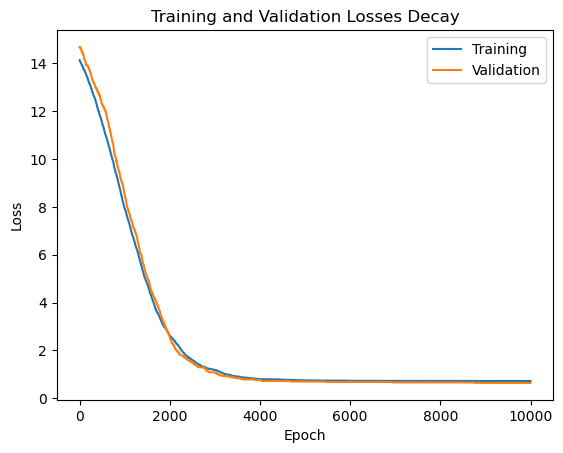

In [31]:
plt.figure()
plt.plot(np.arange(epochs), losses_train)
plt.plot(np.arange(epochs), losses_val)
plt.title('Training and Validation Losses Decay')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()


#  Model Evaluation

In [32]:
y_pred = perceptron(X_test, W, b)
y_pred_binary = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8307
Precision: 0.8163
Recall: 0.8493
F1 Score: 0.8325
